In [1]:
from __future__ import print_function
import keras
from keras.models import Sequential, Model, load_model
from keras import backend as K

import tensorflow as tf

import os
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import aparent.visualization as vis


Using TensorFlow backend.


<h2>Load APARENT model</h2>
<br/>
-- Load APARENT, which has been trained to predict the isoform abundance and cut profile of a proximal PAS given a fixed background distal PAS (trained on random 3' UTR APA MPRA data).<br/>

In [2]:
#Load base APARENT model

save_dir = os.path.join(os.getcwd(), '../saved_models')
model_name = 'aparent_large_lessdropout_all_libs_no_sampleweights.h5'
model_path = os.path.join(save_dir, model_name)

aparent_model = load_model(model_path)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/home/johli/anaconda3/envs/aparent/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


<h2>Example: PSMC6 Gene variant prediction</h2>
<br/>
-- Predict the isoform log fold change w.r.t the wildtype PAS for every possible SNV).<br/>

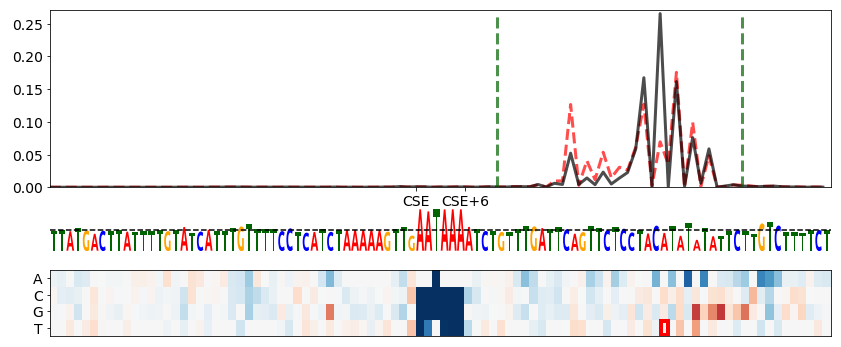

In [4]:
#Example PAS sequence from APADB (gene = PSMC6)

#PAS Sequence
seq = 'AGATAGTGGTATAAGAAAGCATTTCTTATGACTTATTTTGTATCATTTGTTTTCCTCATCTAAAAAGTTGAATAAAATCTGTTTGATTCAGTTCTCCTACATATATATTCTTGTCTTTTCTGAGTATATTTACTGTGGTCCTTTAGGTTCTTTAGCAAGTAAACTATTTGATAACCCAGATGGATTGTGGATTTTTGAATATTAT'

#Predict mutation map (single-nucleotide variants)
vis.mut_map(
    aparent_model,
    seq,
    [(100, 'T', 'red')],
    seq_start=70-45,
    seq_end=70+6+45,
    isoform_start=80,
    isoform_end=110,
    figsize=(14, 6),
    height_ratios=[4, 1, 1.5],
    logodds_clip=1.0
)
